<h5> Description of dataset and task

The Entertainment Software Rating Board(ESRB) ratings provide information about the contents of a game so parents and consumers can make informed choices about which game are right for the family (https://www.esrb.org/#rating-categories).

The *Video Games Rating by 'ESRB'* is a dataset composed of **1895** games with 34 of *ESRB Rating Content* along with its name and console exclusivity as features for each game. 
<p> This Notebook aims to create and experiment models capable of classifying games into their proper *ESRB Rating*. </p>


*ESRB Rating Content* (32) refers to the following:
- Alcohol Reference : Reference to and/or images of alcoholic beverages.
- Animated Blood : Discolored and/or unrealistic depictions of blood.
- Blood : Depictions of blood.
- Blood and Gore : 	Depictions of blood or the mutilation of body parts.
- Cartoon Violence : Violent actions involving cartoon-like situations and characters. May include violence where a character is unharmed after the action has been inflicted.
- Crude Humor : Depictions or dialogue involving vulgar antics, including "bathroom" humor.
- Drug Reference : 	Reference to and/or images of illegal drugs.
- Fantasy Violence : Violent actions of a fantasy nature, involving human or non-human characters in situations easily distinguishable from real life.
- Intense Violence : Graphic and realistic-looking depictions of physical conflict. May involve extreme and/or realistic blood, gore, weapons, and depictions of human injury and death.
- Language : Moderate use of profanity.
- Lyrics : References to profanity, sexuality, violence, alcohol, or drug use in music.
- Mature Humor : Depictions or dialogue involving "adult" humor, including sexual references.
- Mild Blood : 	Some blood.
- Mild Cartoon Violence : Some violent actions involving cartoon.
- Mild Fantasy Violence : Some violent actions of a fantasy nature.
- Mild Language : 	Mild to moderate use of profanity.
- Mild Lyrics : Mild References to profanity, sexuality, violence, alcohol, or drug use in music.
- Mild Suggestive Themes : 	some provocative references or materials
- Mild Violence : 	Some scenes involving aggressive conflict.
- No Descriptors : 	No content descriptors
- Nudity : 	Graphic or prolonged depictions of nudity.
- Partial Nudity : Brief and/or mild depictions of nudity.
- Sexual Content : Non-explicit depictions of sexual behavior, possibly including partial nudity.
- Sexual Themes : 	References to sex or sexuality.
- Simulated Gambling : Player can gamble without betting or wagering real cash or currency.
- Strong Language : Explicit and/or frequent use of profanity.
- Strong Sexual Content : 	Explicit and/or frequent depictions of sexual behavior, possibly including nudity.
- Suggestive Themes : 	Provocative references or materials.
- Use of Alcohol :	The consumption of alcoholic beverages.
- Use of Drugs and Alcohol : The consumption of alcoholic and drugs beverages.
- Violence : Scenes involving aggressive conflict. May contain bloodless dismemberment.

*ESRB Rating* refers to the following:
- E : Everyone
- ET : Everyone 10+
- T : teen
- M : Mature

Import revelant libraries.

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

<h5>  Data Preprocessing

In [3]:
# from jupyterthemes import jtplot
# jtplot.style()

In [4]:
df_esrb = pd.read_csv("Video_Games_esrb_rating.csv")
df_esrb.head(5)

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,Monster Jam Steel Titans 2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1,Subnautica: Below Zero,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ET
2,NIER REPLICANT VER.1.22474487139…,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,M
3,Jamestown+,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,ET
4,Neptunia Virtual Stars,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,T


In [5]:
df_esrb.columns

Index(['title', 'console', 'alcohol_reference', 'animated_blood', 'blood',
       'blood_and_gore', 'cartoon_violence', 'crude_humor', 'drug_reference',
       'fantasy_violence', 'intense_violence', 'language', 'lyrics',
       'mature_humor', 'mild_blood', 'mild_cartoon_violence',
       'mild_fantasy_violence', 'mild_language', 'mild_lyrics',
       'mild_suggestive_themes', 'mild_violence', 'no_descriptors', 'nudity',
       'partial_nudity', 'sexual_content', 'sexual_themes',
       'simulated_gambling', 'strong_janguage', 'strong_sexual_content',
       'suggestive_themes', 'use_of_alcohol', 'use_of_drugs_and_alcohol',
       'violence', 'esrb_rating'],
      dtype='object')

`strong_janguage` is a clear typo of `strong_language` so we replace that.

In [6]:
df_esrb = df_esrb.rename(columns={"strong_janguage" : "strong_language"})

Let's display the general `info` of the dataset

In [7]:
df_esrb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1895 entries, 0 to 1894
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   title                     1895 non-null   object
 1   console                   1895 non-null   int64 
 2   alcohol_reference         1895 non-null   int64 
 3   animated_blood            1895 non-null   int64 
 4   blood                     1895 non-null   int64 
 5   blood_and_gore            1895 non-null   int64 
 6   cartoon_violence          1895 non-null   int64 
 7   crude_humor               1895 non-null   int64 
 8   drug_reference            1895 non-null   int64 
 9   fantasy_violence          1895 non-null   int64 
 10  intense_violence          1895 non-null   int64 
 11  language                  1895 non-null   int64 
 12  lyrics                    1895 non-null   int64 
 13  mature_humor              1895 non-null   int64 
 14  mild_blood              

Since theres no `null` values in the dataset, we can proceed

In [8]:
df_no_desriptors = df_esrb[df_esrb['no_descriptors'] == 1].sum(axis=1) 
df_no_desriptors.shape[0]

C:\Users\Kyle Chua\AppData\Local\Temp\ipykernel_2288\1975444802.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_no_desriptors = df_esrb[df_esrb['no_descriptors'] == 1].sum(axis=1)


322

Since `no_descriptors` means that none of the _ESRB Content_ is found in the game, we need to check fix games that might contradict that.

In [9]:
(df_no_desriptors>1).sum()
# print(df_no_desriptors)

205

In [10]:
idx = df_no_desriptors[df_no_desriptors>1].index
# df_esrb.iloc[idx].loc['no_descriptors'] = 0

df_esrb.loc[idx,'no_descriptors'] = 0

df_esrb.iloc[idx]['no_descriptors']

0       0
5       0
27      0
30      0
31      0
       ..
1867    0
1872    0
1875    0
1877    0
1894    0
Name: no_descriptors, Length: 205, dtype: int64

Seems like there are 205 entries have the `no_descriptors` flagged wrong.

<h5> Exploratory data analysis

Which _ESRB Rating_ is most prominent?

([<matplotlib.patches.Wedge at 0x1eddb84c310>,
 [Text(0.4571073038439642, 1.000526317880995, 'E'),
  Text(-1.0846159132817186, 0.18332572284342297, 'ET'),
  Text(-0.40849519606388207, -1.021338178466237, 'T'),
  Text(0.8812655227327117, -0.6583092574486862, 'M')],
 [Text(0.24933125664216227, 0.5457416279350882, '689'),
  Text(-0.5916086799718464, 0.09999584882368524, '416'),
  Text(-0.2228155614893902, -0.5570935518906747, '403'),
  Text(0.48069028512693357, -0.3590777767901924, '387')])

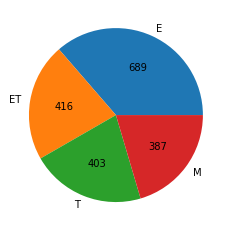

In [11]:
ratings = ["E" , "ET" , "T", "M"]

counts = df_esrb['esrb_rating'].value_counts()

plt.pie(counts, labels= ratings, autopct= lambda x: '{:.0f}'.format(x* len(df_esrb) / 100))

The _ESRB Rating_ **T** appears to be the most prominent rating.

Next, lets find the most prominent `ESRB Rating Content`

<AxesSubplot:>

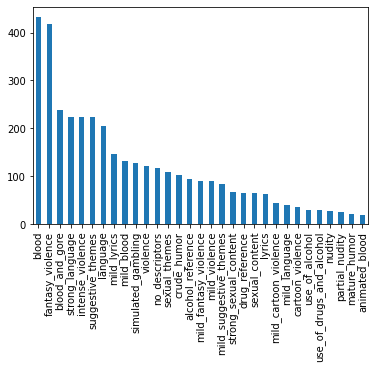

In [12]:
df_dropped = df_esrb.drop(['title','console','esrb_rating'], axis = 1)
df_count_content = df_dropped.sum(axis=0)
df_count_content.sort_values(axis=0, ascending=False, inplace=True)
df_count_content.plot.bar(x="Content", y="Count", )

We can visibly see that the _ESRB Content_ **blood** is the most prominent while **fantasy_violence** comes close in second.

Let us check the correlelations of each _ESRB Content_

In [13]:
df_esrb.columns

Index(['title', 'console', 'alcohol_reference', 'animated_blood', 'blood',
       'blood_and_gore', 'cartoon_violence', 'crude_humor', 'drug_reference',
       'fantasy_violence', 'intense_violence', 'language', 'lyrics',
       'mature_humor', 'mild_blood', 'mild_cartoon_violence',
       'mild_fantasy_violence', 'mild_language', 'mild_lyrics',
       'mild_suggestive_themes', 'mild_violence', 'no_descriptors', 'nudity',
       'partial_nudity', 'sexual_content', 'sexual_themes',
       'simulated_gambling', 'strong_language', 'strong_sexual_content',
       'suggestive_themes', 'use_of_alcohol', 'use_of_drugs_and_alcohol',
       'violence', 'esrb_rating'],
      dtype='object')

In [14]:
correlation = df_dropped.corr()
correlation.style.background_gradient(cmap="coolwarm", axis=None).set_precision(2)

C:\Users\Kyle Chua\AppData\Local\Temp\ipykernel_2288\3932607654.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  correlation.style.background_gradient(cmap="coolwarm", axis=None).set_precision(2)


,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,language,lyrics,mature_humor,mild_blood,mild_cartoon_violence,mild_fantasy_violence,mild_language,mild_lyrics,mild_suggestive_themes,mild_violence,no_descriptors,nudity,partial_nudity,sexual_content,sexual_themes,simulated_gambling,strong_language,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence
alcohol_reference,1.00,0.00,-0.08,-0.04,0.05,-0.00,0.01,-0.08,0.15,-0.03,0.08,0.11,0.02,0.12,-0.04,0.03,0.01,0.22,0.10,-0.06,0.03,-0.01,-0.04,-0.03,-0.00,-0.08,0.01,-0.00,0.16,-0.03,-0.04
animated_blood,0.00,1.00,-0.05,-0.04,-0.01,-0.00,0.15,-0.03,0.09,0.05,-0.02,-0.01,0.03,-0.02,-0.02,-0.01,-0.03,0.06,-0.02,-0.03,-0.01,-0.01,-0.02,-0.02,-0.03,-0.02,-0.02,-0.04,0.07,0.03,0.02
blood,-0.08,-0.05,1.00,-0.21,-0.07,-0.08,-0.04,-0.17,0.09,0.03,0.06,0.12,-0.13,-0.07,-0.12,-0.08,-0.01,-0.00,-0.08,-0.14,-0.02,0.05,0.08,0.07,0.11,0.29,-0.04,0.09,-0.04,-0.02,0.01
blood_and_gore,-0.04,-0.04,-0.21,1.00,-0.04,-0.03,0.12,-0.17,0.29,0.10,0.05,-0.03,-0.07,-0.06,-0.08,-0.06,-0.09,-0.04,-0.05,-0.10,0.12,-0.00,0.14,0.12,0.01,0.22,0.34,-0.03,-0.01,0.05,0.06
cartoon_violence,0.05,-0.01,-0.07,-0.04,1.00,-0.02,0.01,-0.08,-0.05,-0.05,0.04,-0.02,-0.04,0.00,-0.01,-0.02,0.00,0.08,0.02,-0.04,-0.02,-0.02,-0.03,0.03,-0.02,-0.05,-0.03,0.01,0.04,0.01,-0.04
crude_humor,-0.00,-0.00,-0.08,-0.03,-0.02,1.00,-0.05,-0.08,0.09,-0.06,0.03,0.02,-0.06,0.10,-0.02,0.01,-0.06,0.08,-0.03,-0.06,0.01,0.01,-0.03,-0.03,0.32,-0.07,0.02,-0.03,-0.01,-0.03,-0.01
drug_reference,0.01,0.15,-0.04,0.12,0.01,-0.05,1.00,-0.10,0.02,0.17,0.05,0.06,0.14,-0.01,-0.03,-0.03,0.01,0.02,0.01,-0.05,0.02,0.05,0.03,0.09,0.06,0.16,0.07,0.04,-0.02,-0.02,-0.00
fantasy_violence,-0.08,-0.03,-0.17,-0.17,-0.08,-0.08,-0.10,1.00,-0.17,-0.00,-0.03,0.06,0.23,-0.07,-0.11,-0.08,0.10,0.03,-0.01,-0.14,-0.01,-0.05,-0.04,-0.04,-0.04,-0.07,-0.05,0.08,0.00,0.00,-0.09
intense_violence,0.15,0.09,0.09,0.29,-0.05,0.09,0.02,-0.17,1.00,-0.11,0.07,0.05,-0.06,0.09,-0.07,-0.05,-0.11,0.17,0.01,-0.09,0.09,-0.04,0.00,0.02,0.01,0.10,0.39,-0.01,0.06,0.01,-0.01
language,-0.03,0.05,0.03,0.10,-0.05,-0.06,0.17,-0.00,-0.11,1.00,-0.04,-0.01,0.04,-0.05,-0.05,-0.02,-0.10,-0.08,-0.01,-0.09,0.08,0.02,-0.03,0.09,0.04,0.02,-0.01,0.08,-0.00,0.02,-0.02


It seems that generally the correlation between each *ESRB Content* is very weak with the strongest correlation of *0.39* between .

<h5> Model Training

Split data into dependent and independent variables

In [25]:
df_esrb.head()

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_language,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,Monster Jam Steel Titans 2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1,Subnautica: Below Zero,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ET
2,NIER REPLICANT VER.1.22474487139…,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,M
3,Jamestown+,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,ET
4,Neptunia Virtual Stars,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,T


In [30]:
X = df_esrb.values[0:,1:-1]
y = df_esrb.values[:,-1]

In [40]:
print(X)

[[1 0 0 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]


In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [43]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=42)

In [44]:
dtc.fit(X_train, y_train)
predictions_train = dtc.predict(X_train)

In [45]:
from sklearn.metrics import accuracy_score

def compute_accuracy(predictions, actual):
    # write code here
    return accuracy_score(actual, predictions) * 100

In [46]:
print("Training accuracy: ", compute_accuracy(y_train, predictions_train),"%")

Training accuracy:  92.23227752639518 %


In [47]:
predictions = dtc.predict(X_test)
print("Testing accuracy: ", compute_accuracy(y_test, predictions),"%")

Testing accuracy:  83.30404217926186 %


<h5> Model Selection and hyperparameter tuning

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,stratify=y,test_size=0.3)

In [49]:
unique, counts = np.unique(y_train, return_counts=True)
print("Training data label counts:")
print(np.array([unique, counts]))

Training data label counts:
[['E' 'ET' 'M' 'T']
 [291 282 271 482]]


In [81]:
ratings = np.array(unique)

In [50]:
dtc = DecisionTreeClassifier()

In [51]:
hyperparameters = [
    {
        'criterion': ['gini', 'entropy'],
        'max_depth': [ 5, 10, 20, 30],
        'min_samples_split': [2, 4, 6, 10, 15, 20],
        'max_leaf_nodes': [3, 5, 10, 20, 50, 100],
    }
]

Create  `RandomizedSearchCV` object

In [53]:
from sklearn.model_selection import RandomizedSearchCV
rsc_esrb = RandomizedSearchCV(dtc, n_iter=50, param_distributions=hyperparameters,cv=5,random_state=42)

In [55]:
rsc_esrb.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=50,
                   param_distributions=[{'criterion': ['gini', 'entropy'],
                                         'max_depth': [5, 10, 20, 30],
                                         'max_leaf_nodes': [3, 5, 10, 20, 50,
                                                            100],
                                         'min_samples_split': [2, 4, 6, 10, 15,
                                                               20]}],
                   random_state=42)

Get the best parameters found from hyperparameter search

In [57]:
pd.set_option('display.max_colwidth', None)

rsc_results = pd.DataFrame(rsc_esrb.cv_results_)
rsc_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_max_leaf_nodes,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001789,2.437248e-04,0.000397,1.984062e-04,10,5,10,gini,"{'min_samples_split': 10, 'max_leaf_nodes': 5, 'max_depth': 10, 'criterion': 'gini'}",0.665414,0.686792,0.671698,0.637736,0.705660,0.673460,0.022622,21
1,0.001988,1.512408e-06,0.000397,1.986268e-04,4,10,5,entropy,"{'min_samples_split': 4, 'max_leaf_nodes': 10, 'max_depth': 5, 'criterion': 'entropy'}",0.680451,0.686792,0.664151,0.637736,0.694340,0.672694,0.020112,27
2,0.001588,1.969102e-04,0.000397,1.985588e-04,15,3,30,entropy,"{'min_samples_split': 15, 'max_leaf_nodes': 3, 'max_depth': 30, 'criterion': 'entropy'}",0.507519,0.584906,0.558491,0.509434,0.584906,0.549051,0.034510,37
3,0.001887,1.983416e-04,0.000398,1.992560e-04,2,5,10,gini,"{'min_samples_split': 2, 'max_leaf_nodes': 5, 'max_depth': 10, 'criterion': 'gini'}",0.665414,0.686792,0.671698,0.637736,0.705660,0.673460,0.022622,21
4,0.001689,2.445641e-04,0.000496,1.451027e-06,4,3,10,entropy,"{'min_samples_split': 4, 'max_leaf_nodes': 3, 'max_depth': 10, 'criterion': 'entropy'}",0.507519,0.584906,0.558491,0.509434,0.584906,0.549051,0.034510,37
5,0.001589,1.986474e-04,0.000397,1.985078e-04,10,5,5,gini,"{'min_samples_split': 10, 'max_leaf_nodes': 5, 'max_depth': 5, 'criterion': 'gini'}",0.665414,0.686792,0.671698,0.637736,0.705660,0.673460,0.022622,21
6,0.001611,1.924419e-04,0.000375,1.926604e-04,15,5,10,gini,"{'min_samples_split': 15, 'max_leaf_nodes': 5, 'max_depth': 10, 'criterion': 'gini'}",0.665414,0.686792,0.671698,0.637736,0.705660,0.673460,0.022622,21
7,0.001887,2.008075e-04,0.000298,2.431572e-04,15,50,5,entropy,"{'min_samples_split': 15, 'max_leaf_nodes': 50, 'max_depth': 5, 'criterion': 'entropy'}",0.680451,0.701887,0.656604,0.667925,0.690566,0.679486,0.016017,17
8,0.001588,1.992518e-04,0.000398,1.987698e-04,20,3,20,gini,"{'min_samples_split': 20, 'max_leaf_nodes': 3, 'max_depth': 20, 'criterion': 'gini'}",0.507519,0.483019,0.558491,0.449057,0.490566,0.497730,0.035846,45
9,0.001987,6.843901e-07,0.000496,2.780415e-07,10,10,10,entropy,"{'min_samples_split': 10, 'max_leaf_nodes': 10, 'max_depth': 10, 'criterion': 'entropy'}",0.778195,0.781132,0.754717,0.720755,0.777358,0.762432,0.022880,13


In [56]:
rsc_esrb.best_params_

{'min_samples_split': 15,
 'max_leaf_nodes': 100,
 'max_depth': 30,
 'criterion': 'entropy'}

Get the  best estimator index to in order to get the entry of the best performing model.

In [59]:
best_index = rsc_esrb.best_index_
best_index

23

In [60]:
rsc_results.loc[best_index]

mean_fit_time                                                                                               0.002484
std_fit_time                                                                                                0.000002
mean_score_time                                                                                             0.000397
std_score_time                                                                                              0.000198
param_min_samples_split                                                                                           15
param_max_leaf_nodes                                                                                             100
param_max_depth                                                                                                   30
param_criterion                                                                                              entropy
params                     {'min_samples_split': 15, 'max_leaf_n

Get the best estimator

In [62]:
rsc_esrb.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=30, max_leaf_nodes=100,
                       min_samples_split=15)

In [67]:
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=30, max_leaf_nodes=100, min_samples_split=15)
dtc.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=30, max_leaf_nodes=100,
                       min_samples_split=15)

In [68]:
predictions = dtc.predict(X_test)
print("Test accuracy is : ", compute_accuracy(predictions, y_test), "%")

Test accuracy is :  83.12829525483303 %


In [96]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           E       0.97      0.98      0.98       125
          ET       0.68      0.86      0.76       121
           M       0.90      0.82      0.86       116
           T       0.83      0.73      0.77       207

    accuracy                           0.83       569
   macro avg       0.84      0.85      0.84       569
weighted avg       0.84      0.83      0.83       569



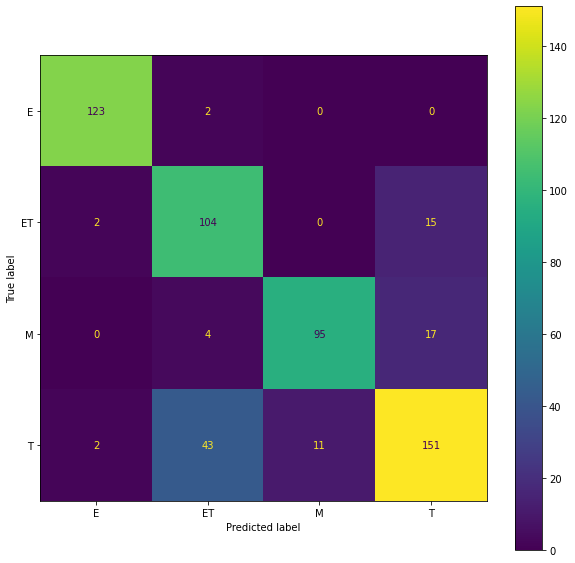

In [121]:
cm = confusion_matrix(y_test, predictions, labels=ratings)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ratings)
fig, ax = plt.subplots(figsize=(10,10))
display.plot(ax=ax)

<h5> Insights and conclusion